0.9629629629629629
[[18  1  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  7  0  0]
 [ 1  0  0  0  6  0]
 [ 0  0  0  0  0  2]]

1.0
[[92  0  0  0  0  0]
 [ 0 51  0  0  0  0]
 [ 0  0 61  0  0  0]
 [ 0  0  0 41  0  0]
 [ 0  0  0  0 41  0]
 [ 0  0  0  0  0 18]]


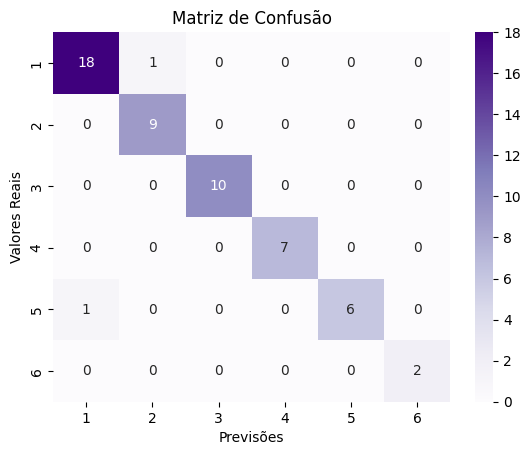

In [ ]:
import pandas as pd
import numpy as np
from joblib import dump
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, mean_absolute_error, r2_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

df = pd.read_csv('dermatology.csv')
df = df.replace('?', np.nan)
df.dropna(inplace=True)

Y = df['class']
X = df.drop('class', axis = 1)

pipeline = Pipeline ([
    ('scaler', StandardScaler()),
    ('classifier', SVC()),
    # ('classifier', tree.DecisionTreeClassifier(random_state=100)),
    # ('classifier', KNeighborsClassifier()),
])

pca = PCA(n_components = 'mle') #decide o melhor número de forma automatizada
pca.fit(X)
X = pca.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,
random_state=42)

parameters = {
    'classifier__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__degree' : [0, 2, 3, 4],

    # 'classifier__max_depth' : [4, 5, 6],
    # 'classifier__min_samples_split' : [2, 3],
    # 'classifier__min_samples_leaf': [4, 5, 6],

    # 'classifier__n_neighbors': [3, 4, 5, 6],
    # 'classifier__algorithm': ['auto'],
    # 'classifier__leaf_size': [1],
}

model = GridSearchCV(
    pipeline,
    parameters,
    n_jobs = 3
)

model.fit(X_train, Y_train)

print(accuracy_score(Y_test, model.predict(X_test)))
print(confusion_matrix(Y_test, model.predict(X_test)))
print()
print(accuracy_score(Y_train, model.predict(X_train)))
print(confusion_matrix(Y_train, model.predict(X_train)))

Y_pred = model.predict(X_test)

# Matriz de Confusão
cm = confusion_matrix(Y_test, Y_pred)
violet_palette = sns.light_palette("violet", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão de Teste')
plt.show()

In [54]:
print(model.best_params_)

{'classifier__degree': 0, 'classifier__kernel': 'linear'}
